In [1]:
#if sklearn is not installed uncomment and run the following
#import sys
#!{sys.executable} -m pip install sklearn --upgrade

In [55]:
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.cluster import KMeans


In [20]:
# print graphs in the document
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/hanisaf/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


The goal of this practice is to uncover hidden relationships in the GapMinde dataset using clustering techniques

1- Load the Gapminder dataset

In [4]:
data = pd.read_csv('./data/gapminder.tsv', delimiter='\t')

In [5]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


2- cluster the data based on lifeExp and pop, use the KMeans algorithm, what do these cluster mean?

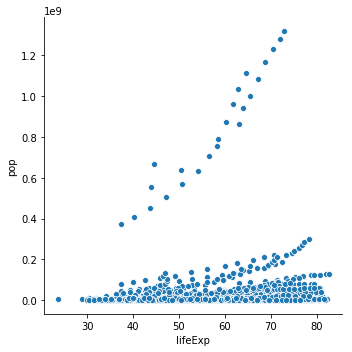

In [34]:
sns.relplot(x='lifeExp', y='pop', data=data)

In [26]:
X = data[['lifeExp', 'pop']].values

In [49]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [52]:
kmeans.cluster_centers_

array([[5.86570748e+01, 8.05608726e+06],
       [5.26316100e+01, 6.67085127e+08],
       [6.70213360e+01, 1.11254680e+09],
       [6.57879063e+01, 2.03573146e+08],
       [6.42554515e+01, 6.38963379e+07]])

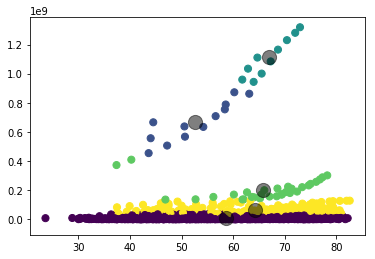

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

3- cluster the data based on all features use the KMeans algorithm, what do these cluster mean?


In [53]:
data2 = pd.get_dummies(data[['year', 'pop', 'gdpPercap', 'lifeExp', 'continent']])

In [54]:
data2.head()

,year,pop,gdpPercap,lifeExp,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,8425333,779.445314,28.801,0,0,1,0,0
1,1957,9240934,820.853030,30.332,0,0,1,0,0
2,1962,10267083,853.100710,31.997,0,0,1,0,0
3,1967,11537966,836.197138,34.020,0,0,1,0,0
4,1972,13079460,739.981106,36.088,0,0,1,0,0


In [58]:
X=data2.values

In [61]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [62]:
kmeans.cluster_centers_

array([[ 1.97919716e+03,  1.31698986e+07,  7.16966630e+03,
         5.92763387e+01,  3.83189122e-01,  1.71199011e-01,
         2.08281829e-01,  2.22496910e-01,  1.48331273e-02],
       [ 1.98350000e+03,  9.08524475e+08,  1.40257513e+03,
         6.05497340e+01, -1.66533454e-16,  0.00000000e+00,
         1.00000000e+00, -8.32667268e-17,  0.00000000e+00],
       [ 1.98571212e+03,  1.66076976e+08,  1.00961481e+04,
         6.40050606e+01,  6.06060606e-02,  3.48484848e-01,
         5.90909091e-01,  2.49800181e-16,  1.21430643e-17]])